In [1]:
import numpy
import matplotlib.pyplot as pyplot

In [2]:
xmin,xmax = -0.5,2.5
nx = 200
xrange = numpy.linspace(xmin,xmax,nx)

In [3]:
phi = (xmin+xmax)/2-xrange

(-0.65, 2.65, -1.65, 1.65)

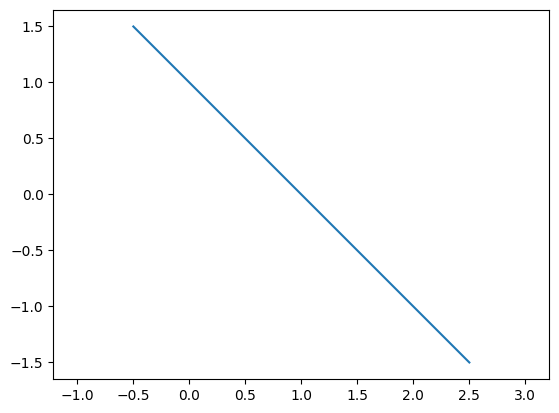

In [4]:
pyplot.figure()
pyplot.plot(xrange,phi)
pyplot.axis('equal')

In [5]:
dx=(xmax-xmin)/nx
h = 5*dx

In [6]:
smeared = numpy.zeros_like(phi)
for i in range(nx):
    if abs(phi[i]) <= h:
        smeared[i] = 0.5 + phi[i]/(2*h) + numpy.sin(2*numpy.pi*phi[i]/(2*h))/(2*numpy.pi)
    else:
        if phi[i] >= 0.:
            smeared[i] = 1
        else:
            smeared[i] = 0.

In [7]:
rhoGas = 0.05
smeared = smeared*rhoGas + (1-smeared)

(-0.65, 2.65, 0.0025000000000000022, 1.0475)

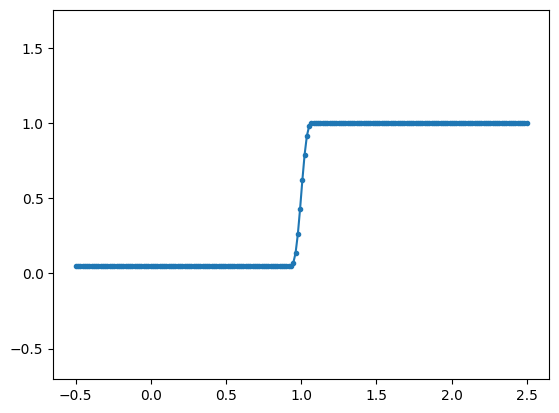

In [8]:
pyplot.figure()
pyplot.plot(xrange,smeared,marker='.')
pyplot.axis('equal')

In [9]:
growthRate = 4
buffer = 0.5
expProfile1 = 2/(1 + numpy.exp(-growthRate*(xrange-numpy.max(xrange))/buffer))

growthRate = 4
buffer = 1.0
expProfile2 = 2/(1 + numpy.exp(-growthRate*(xrange-numpy.max(xrange))/buffer))

growthRate = 4
buffer = 1.5
expProfile3 = 2/(1 + numpy.exp(-growthRate*(xrange-numpy.max(xrange))/buffer))

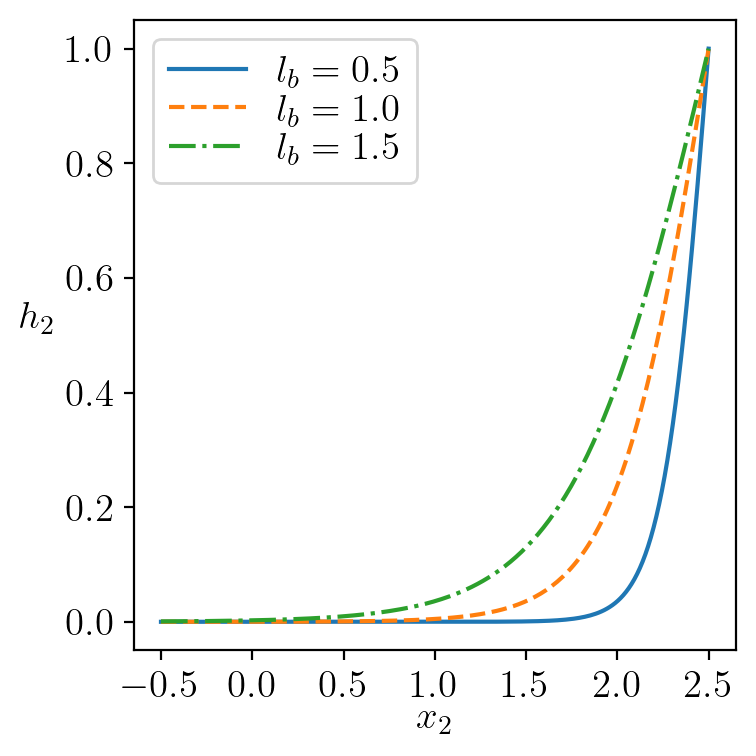

In [10]:
pyplot.rc("font", family="serif", size=14, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
pyplot.figure(figsize=(4,4),dpi=200)
pyplot.plot(xrange,expProfile1,'-')
pyplot.plot(xrange,expProfile2,'--')
pyplot.plot(xrange,expProfile3,'-.')
pyplot.legend([r"$l_b=0.5$", r"$l_b=1.0$", r"$l_b=1.5$"], labelspacing=0.1)
pyplot.xlabel(r"$x_2$", rotation=0, labelpad=-1)
pyplot.ylabel(r"$h_2$", rotation=0, labelpad=10)
pyplot.xticks([-0.5,0,0.5,1.0,1.5,2.0,2.5])
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/profile.png")